# Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [2]:
gender = pd.read_csv("data/gender_submission.csv")
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [3]:
train = pd.read_csv("data/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test = pd.read_csv("data/test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Missing values

### Gender

In [5]:
missing_values = gender.isna().sum()
print(missing_values)

PassengerId    0
Survived       0
dtype: int64


### Train

In [6]:
missing_values = train.isna().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Test

In [7]:
missing_values = test.isna().sum()
print(missing_values)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
df = [gender, train, test]

In [9]:
combined_df = pd.concat(df, keys=['gender, train, test'], names=['DataFrame', 'Index'])

C:\Users\mkemb\AppData\Local\Temp\ipykernel_130320\3129122840.py:1: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  combined_df = pd.concat(df, keys=['gender, train, test'], names=['DataFrame', 'Index'])


In [10]:
missing_values = combined_df.isna()

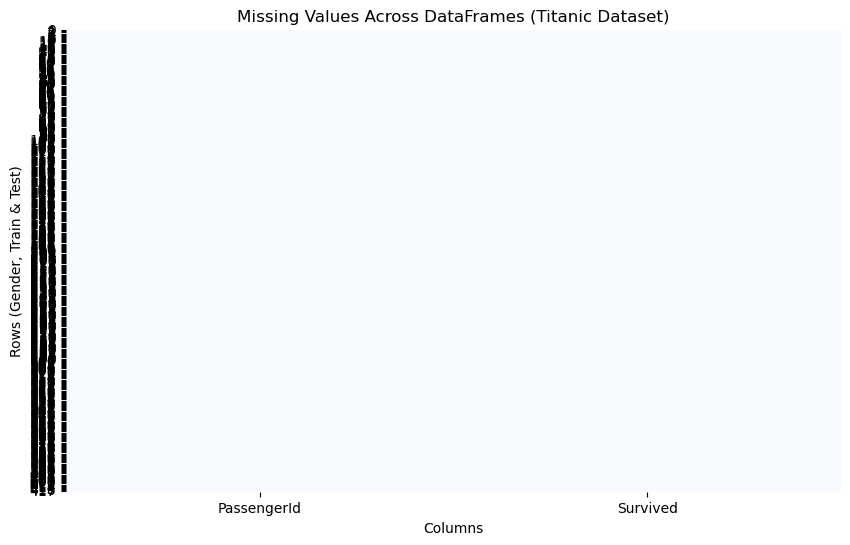

In [11]:
# Plot missing values
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cbar=False, cmap="Blues", xticklabels=combined_df.columns, yticklabels=combined_df.index.get_level_values(1))
plt.title('Missing Values Across DataFrames (Titanic Dataset)')
plt.xlabel('Columns')
plt.ylabel('Rows (Gender, Train & Test)')
plt.show()

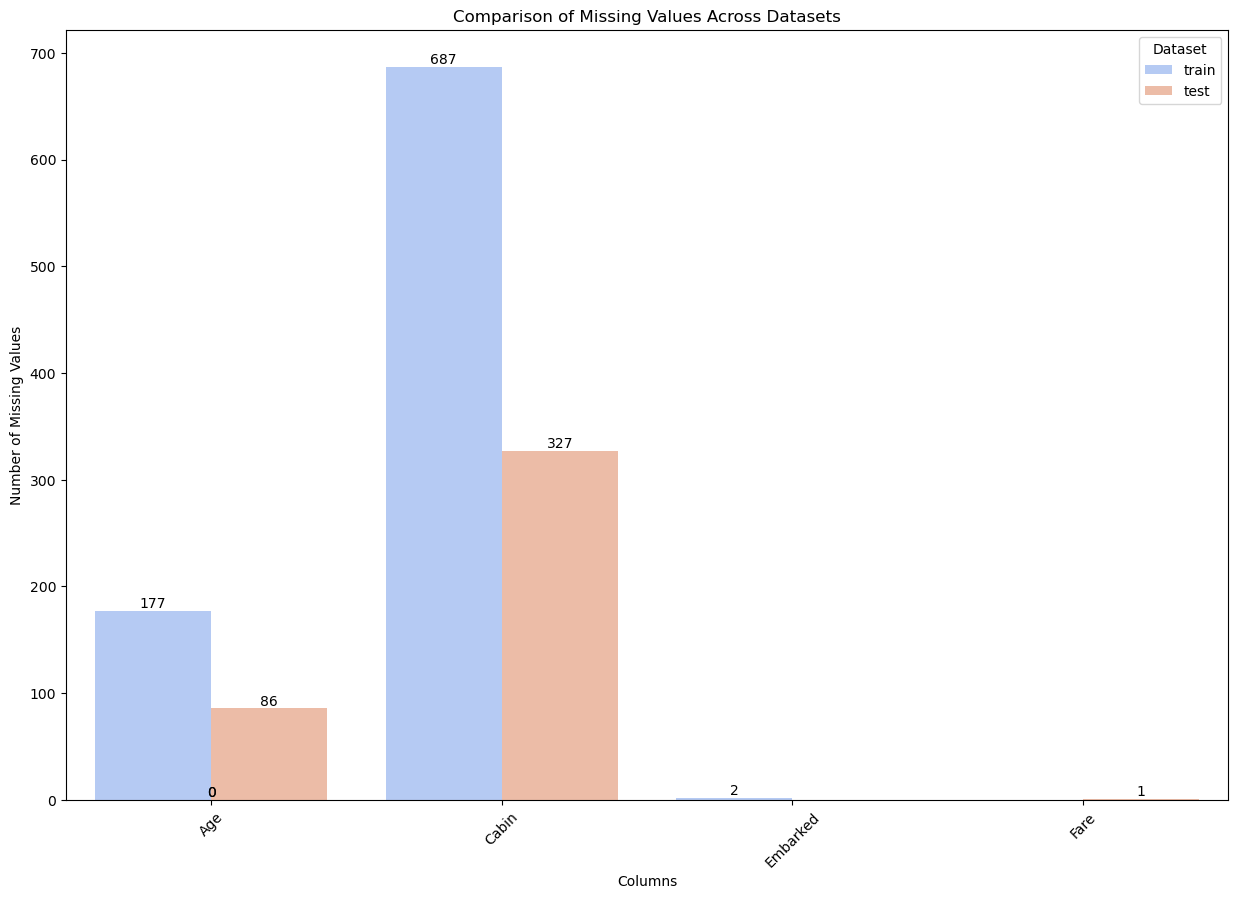

In [12]:
# Function to calculate missing values
def missing_values_df(df, name):
    missing = df.isna().sum()
    missing = missing[missing > 0]  # Filter only columns with missing values
    return pd.DataFrame({"Dataset": name, "Column": missing.index, "Missing Values": missing.values})

# Get missing data for all datasets
gender_missing = missing_values_df(gender, "gender")
train_missing = missing_values_df(train, "train")
test_missing = missing_values_df(test, "test")

# Combine into one DataFrame
missing_data = pd.concat([gender_missing, train_missing, test_missing], ignore_index=True)

# Plot
plt.figure(figsize=(15, 10))
ax = sns.barplot(x="Column", y="Missing Values", hue="Dataset", data=missing_data, palette="coolwarm")

# Add text labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.title("Comparison of Missing Values Across Datasets")
plt.legend(title="Dataset")
plt.show()

In [13]:
summary_stats = gender.describe()
summary_stats_all = gender.describe(include='all')
print("Numerical Summary Statistics:")
print(summary_stats)
print("\nSummary Statistics for All Columns:")
print(summary_stats_all)

Numerical Summary Statistics:
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000

Summary Statistics for All Columns:
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000


In [14]:
summary_stats = train.describe()
summary_stats_all = gender.describe(include='all')
print("Numerical Summary Statistics:")
print(summary_stats)
print("\nSummary Statistics for All Columns:")
print(summary_stats_all)

Numerical Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Summary Statistics for All Columns:
       Passeng

In [15]:
summary_stats = test.describe()
summary_stats_all = gender.describe(include='all')
print("Numerical Summary Statistics:")
print(summary_stats)
print("\nSummary Statistics for All Columns:")
print(summary_stats_all)

Numerical Summary Statistics:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

Summary Statistics for All Columns:
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%  

## Handling Missing data

In [16]:
print("Train Data:\n", train.head())
print("\nTest Data:\n", test.head())

Train Data:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN 

In [17]:
print("\nTrain Info:")
train.info()


Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
print("\nTest Info:")
test.info()


Test Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [19]:
# Check missing values
print("\nMissing Values in Train:\n", train.isnull().sum())
print("\nMissing Values in Test:\n", test.isnull().sum())


Missing Values in Train:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values in Test:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [20]:
# Summary statistics
print("\nTrain Summary:\n", train.describe())
print("\nTest Summary:\n", test.describe())


Train Summary:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Test Summary:
        PassengerId      Pclass         Age      

## Survival Rates

C:\Users\mkemb\AppData\Local\Temp\ipykernel_130320\1872835555.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Survived", data=train, palette="coolwarm")


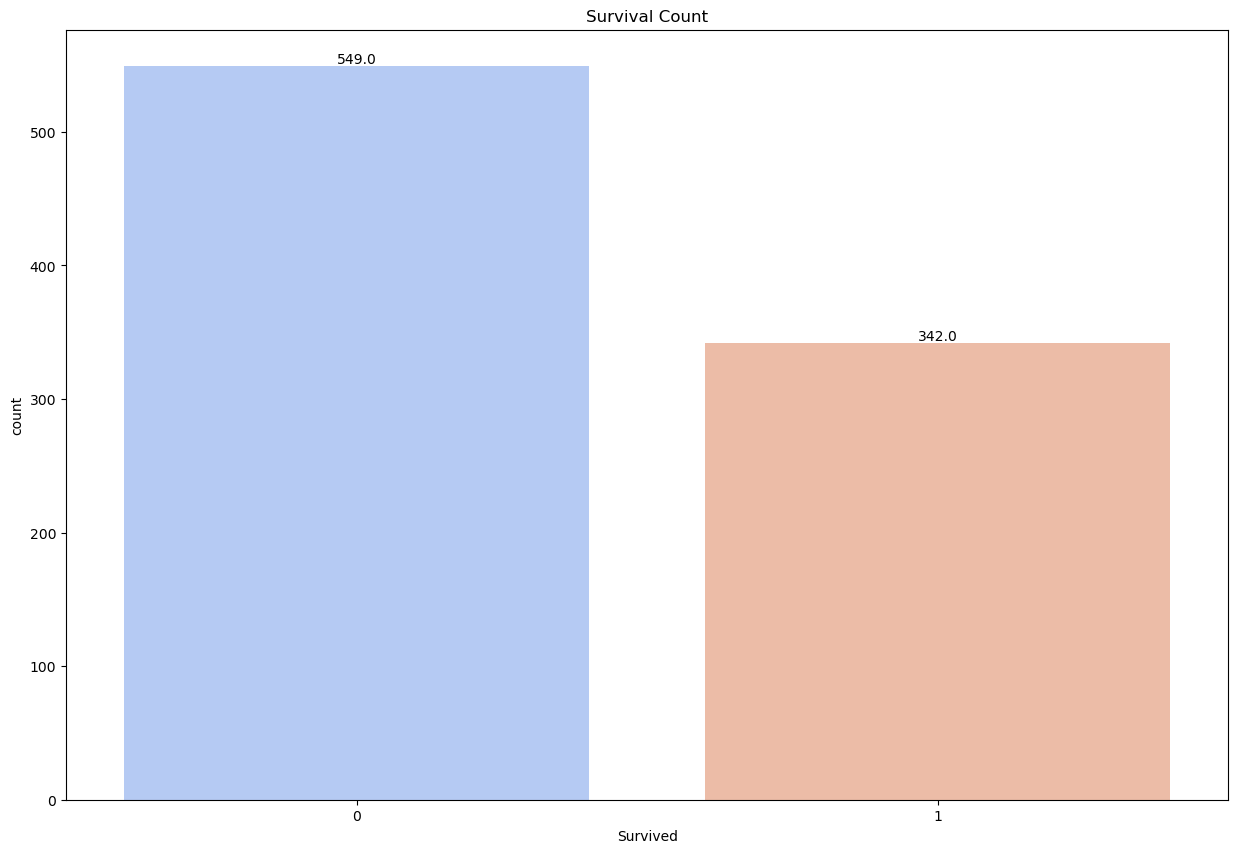

In [21]:
# Survival count plot
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="Survived", data=train, palette="coolwarm")
plt.title("Survival Count")

# Add numbers on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

C:\Users\mkemb\AppData\Local\Temp\ipykernel_130320\2364400780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Sex", y="Survived", data=train, palette="coolwarm")


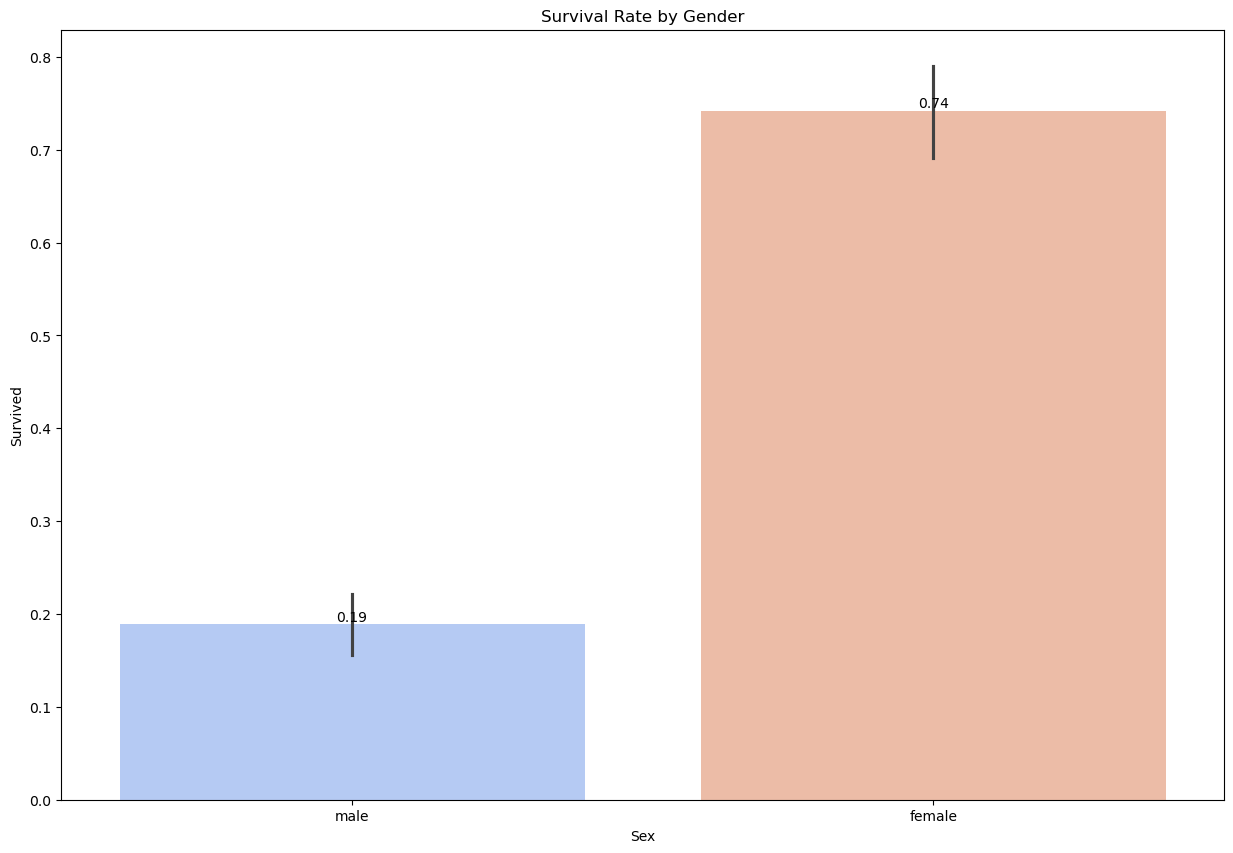

In [22]:
# Survival by gender plot
plt.figure(figsize=(15, 10))
ax = sns.barplot(x="Sex", y="Survived", data=train, palette="coolwarm")
plt.title("Survival Rate by Gender")

# Add numbers on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

C:\Users\mkemb\AppData\Local\Temp\ipykernel_130320\3694532189.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=train, palette="coolwarm")


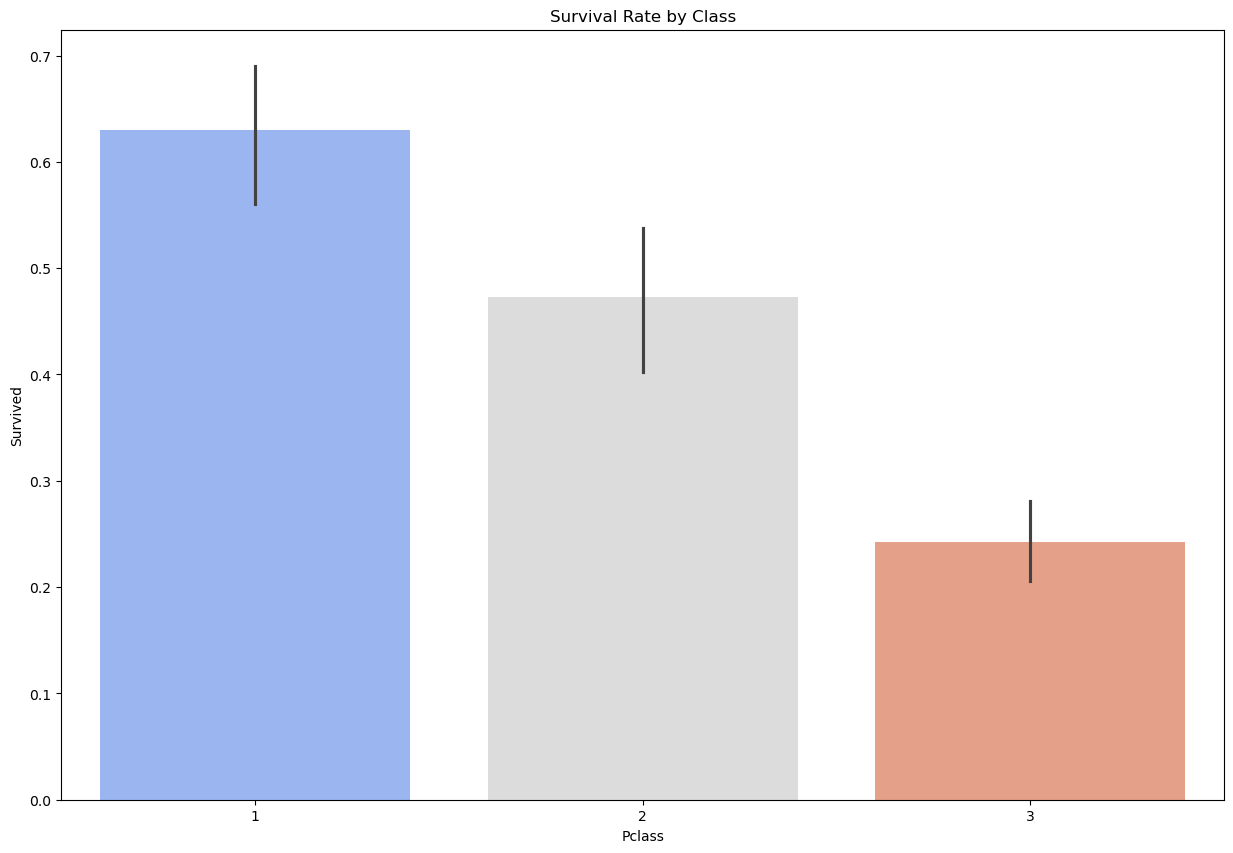

In [23]:
# Survival by class
plt.figure(figsize=(15, 10))
sns.barplot(x="Pclass", y="Survived", data=train, palette="coolwarm")
plt.title("Survival Rate by Class")
plt.show()

## Correlation

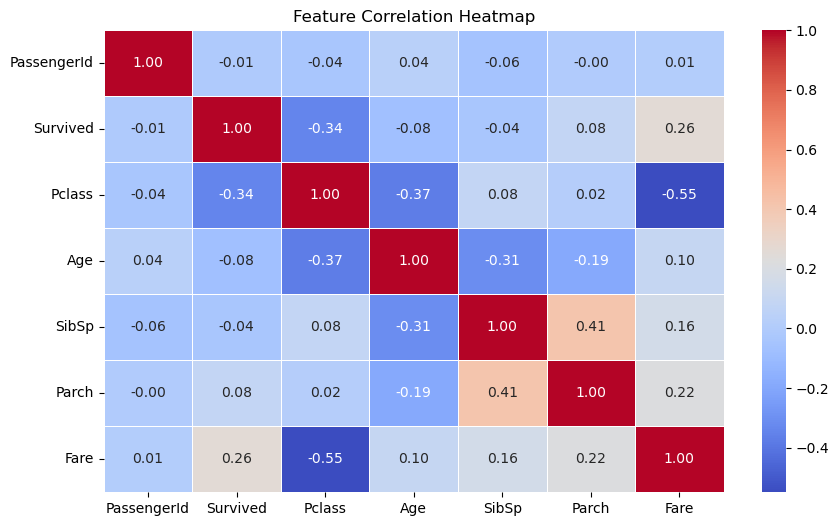

In [24]:
# Select only numeric columns
numeric_train = train.select_dtypes(include=[float, int])

# Calculate correlation matrix
corr_matrix = numeric_train.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

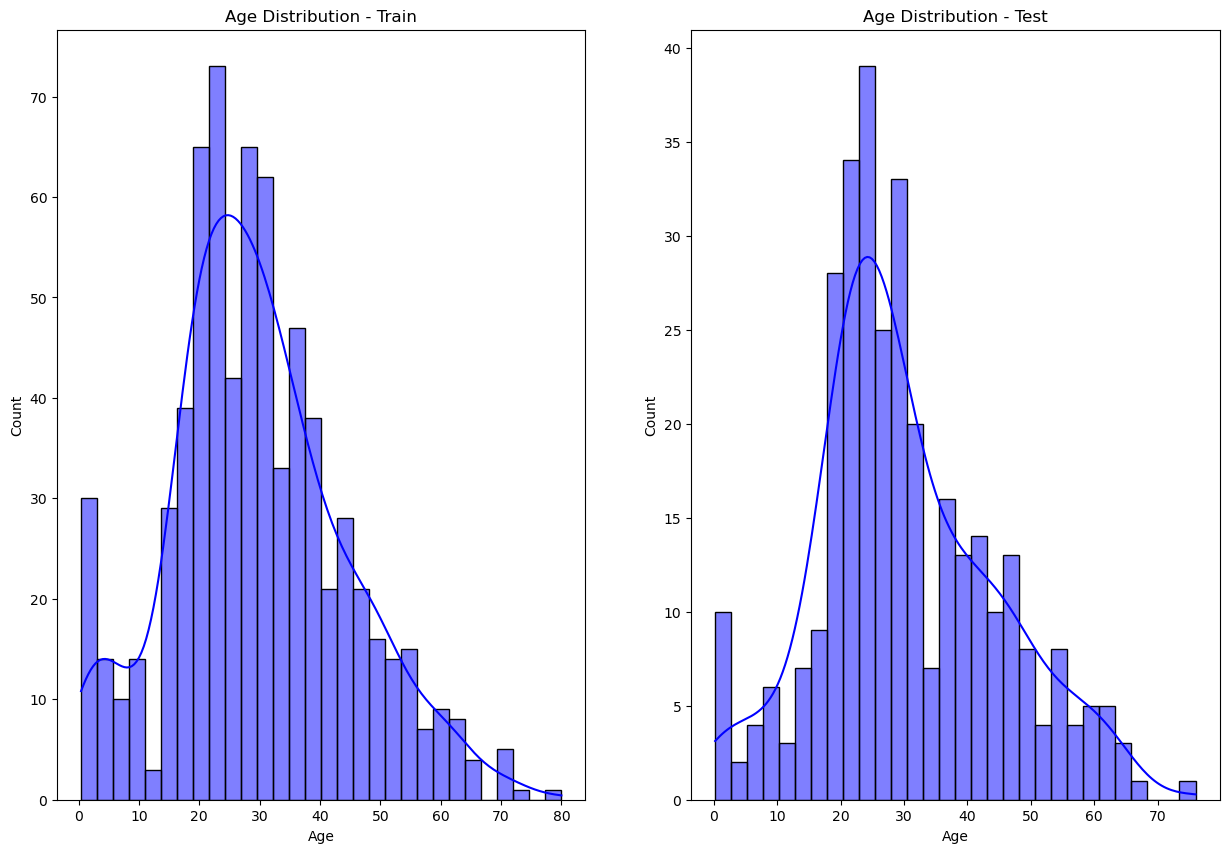

In [25]:
# Compare train & test distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

sns.histplot(train["Age"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Age Distribution - Train")

sns.histplot(test["Age"], bins=30, kde=True, ax=axes[1], color="blue")
axes[1].set_title("Age Distribution - Test")

plt.show()

In [26]:
# Check percentage of missing data
missing_train = train.isna().sum() / len(train) * 100
missing_test = test.isna().sum() / len(test) * 100

print("\nMissing Data Percentage - Train:\n", missing_train)
print("\nMissing Data Percentage - Test:\n", missing_test)


Missing Data Percentage - Train:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Missing Data Percentage - Test:
 PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


In [27]:
# 2. Handle missing 'Age' with the median
train['Age'].fillna(train['Age'].median(), inplace=True)

# 3. Handle missing 'Embarked' with the mode (most frequent value)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# 4. Handle missing 'Fare' with the median (or mean, depending on the data)
train['Fare'].fillna(train['Fare'].median(), inplace=True)

# 5. Optionally, drop 'Cabin' because it has too many missing values
train.drop(columns=['Cabin'], inplace=True)

# 6. Check if all missing values are handled
print("\nMissing Values After Imputation:")
print(train.isna().sum())

# Display the cleaned dataset
print("\nCleaned Data Sample:")
print(train.head())


Missing Values After Imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Cleaned Data Sample:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         

C:\Users\mkemb\AppData\Local\Temp\ipykernel_130320\2009365333.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\mkemb\AppData\Local\Temp\ipykernel_130320\2009365333.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

C:\Users\mkemb\AppData\Local\Temp\ipykernel_130320\3797096441.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Embarked", y="Survived", data=train, palette="coolwarm")


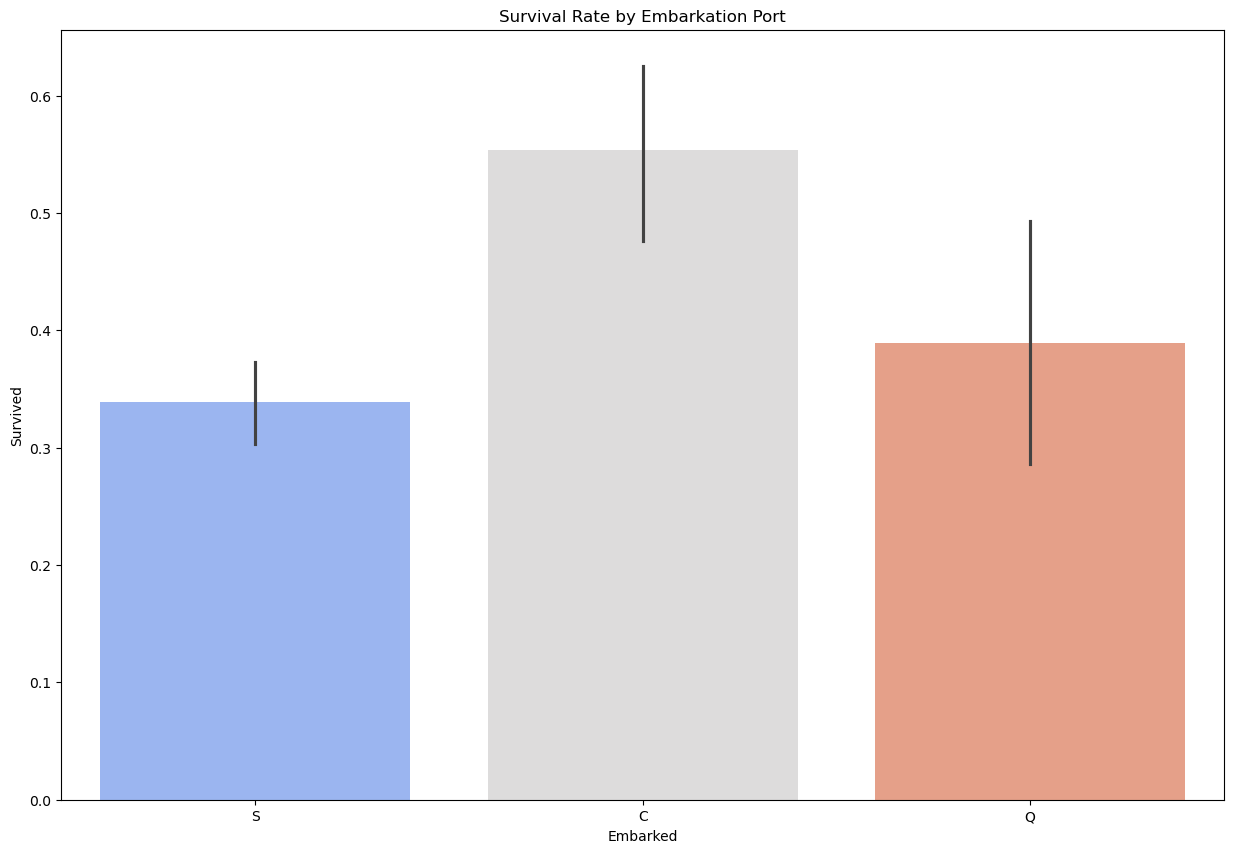

In [28]:
# Survival by Embarked
plt.figure(figsize=(15, 10))
sns.barplot(x="Embarked", y="Survived", data=train, palette="coolwarm")
plt.title("Survival Rate by Embarkation Port")
plt.show()

C:\Users\mkemb\AppData\Local\Temp\ipykernel_130320\1645086914.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="FamilySize", y="Survived", data=train, palette="coolwarm")


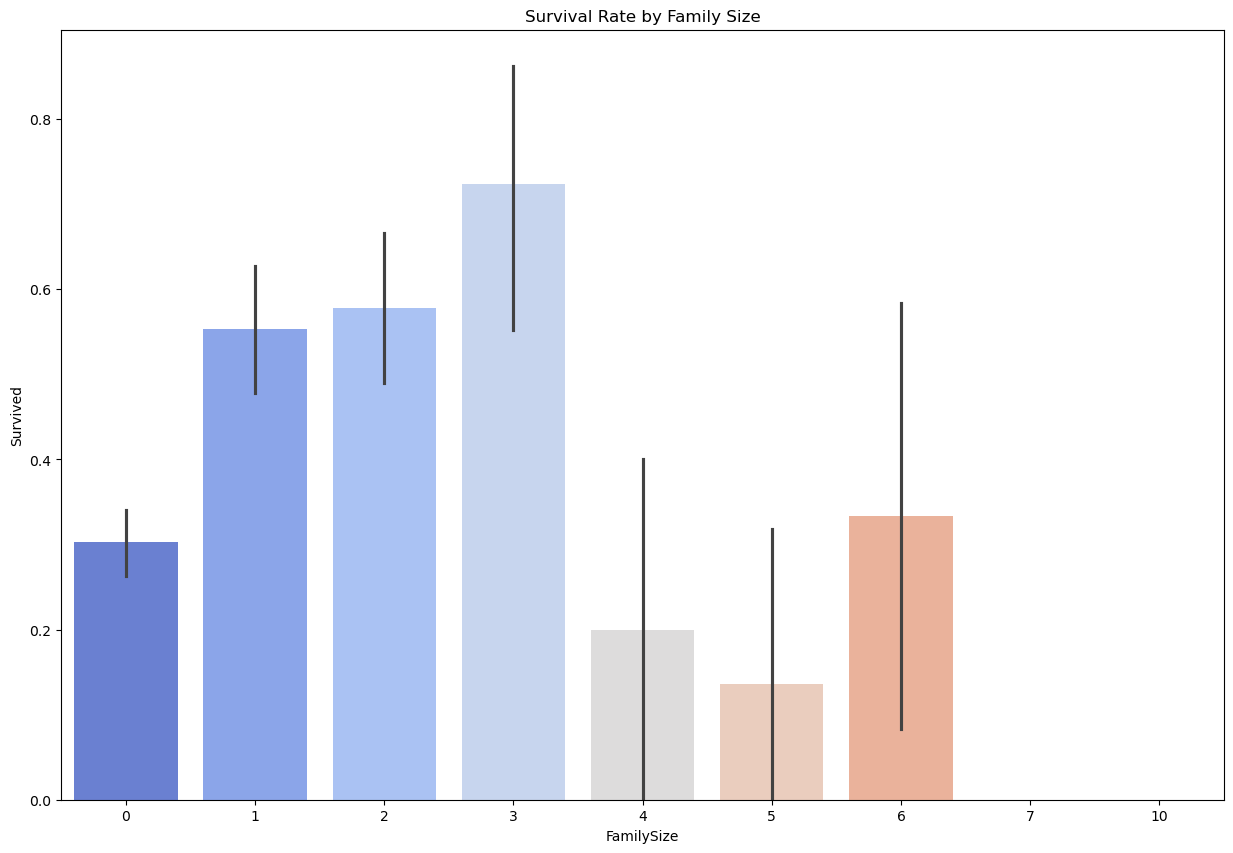

In [29]:
# Survival by Family Size (SibSp + Parch)
train["FamilySize"] = train["SibSp"] + train["Parch"]

plt.figure(figsize=(15, 10))
sns.barplot(x="FamilySize", y="Survived", data=train, palette="coolwarm")
plt.title("Survival Rate by Family Size")
plt.show()